# Separar datos de los CSV originales

## 1 Interpolar datos del archivo CSV de datos recopilados del servidor de la planta física

In [ ]:
# Como las lecturas del código SimularPulsacionTeclas.py llegan a presentar "saltos" entre muestras
# este código busca realizar una interpolación para igualar la cantidad de muestrar con el tiempo de muestreo total

import pandas as pd

# Cargar CSV
df = pd.read_csv("lecturas_simuladas3.csv", parse_dates=["TimestampLocal"])

# Establecer índice de tiempo
df = df.set_index("TimestampLocal")

# Reindexar con frecuencia de 1 segundo
df_resample = df.resample("1S").mean()

# Interpolación método tiempo
df_interp = df_resample.interpolate(method="time", order=3)

# Resetear índice
df_interp = df_interp.reset_index()

# Guardar a un nuevo CSV
df_interp.to_csv("datos_interpolados1.csv", index=False)


C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\652316970.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resample = df.resample("1S").mean()


## 2 Separar datos de los CSV en CSV independientes

### Estado de las válvulas

#### Godot

In [ ]:
import pandas as pd

# Leer el CSV generado mediante Godot
df = pd.read_csv('OpcCliente7.csv')

# Seleccionar solo las columnas NivelTanque1 y NivelTanque2
niveles = df[[' CtrlBomba', 'CtrlSValve', 'CtrlBValve']]
# Mostrar el resultado
print(niveles)

# Guardar el resultado en un nuevo CSV
niveles.to_csv('apertura_valvulas1.csv', index=False)

      CtrlBomba  CtrlSValve  CtrlBValve
0           0.0         0.0         0.0
1           0.0         0.0         0.0
2           0.0         0.0         0.0
3           0.0         0.0         0.0
4           0.0         0.0         0.0
..          ...         ...         ...
589         0.0         0.0         0.0
590         0.0         0.0         0.0
591         0.0         0.0         0.0
592         0.0         0.0         0.0
593         0.0         0.0         0.0

[594 rows x 3 columns]


#### Planta

In [ ]:
import pandas as pd

# Leer el CSV generado por el script InterpolarSaltos.py
df = pd.read_csv('datos_interpolados1.csv')

# Seleccionar solo las columnas NivelTanque1 y NivelTanque2
niveles = df[['CtrlBomba', 'CtrlSValve', 'CtrlBValve']]
# Mostrar el resultado
print(niveles)

# Guardar el resultado en un nuevo CSV
niveles.to_csv('apertura_valvulas_planta1.csv', index=False)

     CtrlBomba  CtrlSValve  CtrlBValve
0          0.0         0.0         0.0
1          0.0         0.0         0.0
2          0.0         0.0         0.0
3          0.0         0.0         0.0
4          0.0         0.0         0.0
..         ...         ...         ...
589        0.0         0.0         0.0
590        0.0         0.0         0.0
591        0.0         0.0         0.0
592        0.0         0.0         0.0
593        0.0         0.0         0.0

[594 rows x 3 columns]


### Caudales

#### Godot

In [ ]:
import pandas as pd

# Leer el CSV generado mediante Godot
df = pd.read_csv('OpcCliente7.csv')

# Seleccionar solo las columnas NivelTanque1 y NivelTanque2
niveles = df[['CaudalEntrada', 'CaudalSalida', 'CaudalIntermedio']]
# Mostrar el resultado
print(niveles)

niveles['CaudalEntrada'] = niveles['CaudalEntrada'] * 60
niveles['CaudalSalida'] = niveles['CaudalSalida'] * 60
niveles['CaudalIntermedio'] = niveles['CaudalIntermedio'] * 60

# Guardar el resultado en un nuevo CSV
niveles.to_csv('caudales_1.csv', index=False)

     CaudalEntrada  CaudalSalida  CaudalIntermedio
0              0.0           0.0               0.0
1              0.0           0.0               0.0
2              0.0           0.0               0.0
3              0.0           0.0               0.0
4              0.0           0.0               0.0
..             ...           ...               ...
589            0.0           0.0               0.0
590            0.0           0.0               0.0
591            0.0           0.0               0.0
592            0.0           0.0               0.0
593            0.0           0.0               0.0

[594 rows x 3 columns]


C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\3500408732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['CaudalEntrada'] = niveles['CaudalEntrada'] * 60
C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\3500408732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['CaudalSalida'] = niveles['CaudalSalida'] * 20
C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\3500408732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

#### Planta

In [ ]:
import pandas as pd

# Leer el CSV generado por el script InterpolarSaltos.py
df = pd.read_csv('datos_interpolados1.csv')

# Seleccionar solo las columnas NivelTanque1 y NivelTanque2
niveles = df[['Qin', 'Qout', 'Qint']]
# Mostrar el resultado
print(niveles)

# Guardar el resultado en un nuevo CSV
niveles.to_csv('caudales_planta1.csv', index=False)

     Qin  Qout  Qint
0    0.0   0.0   0.0
1    0.0   0.0   0.0
2    0.0   0.0   0.0
3    0.0   0.0   0.0
4    0.0   0.0   0.0
..   ...   ...   ...
589  0.0   0.0   0.0
590  0.0   0.0   0.0
591  0.0   0.0   0.0
592  0.0   0.0   0.0
593  0.0   0.0   0.0

[594 rows x 3 columns]


### Altura en CM

#### Godot

In [ ]:
import pandas as pd

# Leer el CSV generado mediante Godot
df = pd.read_csv('OpcCliente7.csv')

# Seleccionar NivelTanque1 y NivelTanque2
niveles = df[['NivelTanque1', 'NivelTanque2']]

# Multiplicar ambos valores por 30/100 (0.3)
niveles['NivelTanque1'] = niveles['NivelTanque1'] * 0.3
niveles['NivelTanque2'] = niveles['NivelTanque2'] * 0.3

# Mostrar el resultado
print(niveles)

# Opcional: Guardar el resultado en un nuevo CSV
niveles.to_csv('niveles_tanques_cm1.csv', index=False)

     NivelTanque1  NivelTanque2
0           2.043         6.819
1           2.043         6.819
2           2.043         6.819
3           2.043         6.819
4           2.043         6.819
..            ...           ...
589         6.552         6.900
590         6.552         6.900
591         6.552         6.900
592         6.552         6.900
593         6.552         6.900

[594 rows x 2 columns]


C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\797084444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['NivelTanque1'] = niveles['NivelTanque1'] * 0.3
C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\797084444.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['NivelTanque2'] = niveles['NivelTanque2'] * 0.3


#### Planta

In [ ]:
import pandas as pd

# Leer el CSV generado por el script InterpolarSaltos.py
df = pd.read_csv('datos_interpolados1.csv')

# Seleccionar NivelTanque1 y NivelTanque2
niveles = df[['Nivel1', 'Nivel2']]

# Multiplicar ambos valores por 30/100 (0.3)
niveles['Nivel1'] = niveles['Nivel1'] * 0.3
niveles['Nivel2'] = niveles['Nivel2'] * 0.3

# Mostrar el resultado
print(niveles)

# Guardar el resultado en un nuevo CSV
niveles.to_csv('niveles_tanques_pool_cm1.csv', index=False)

     Nivel1  Nivel2
0     2.168   6.846
1     2.118   6.846
2     2.118   6.900
3     2.118   6.873
4     2.118   6.846
..      ...     ...
589   6.615   7.620
590   6.565   7.460
591   6.590   7.380
592   6.615   7.300
593   6.615   7.300

[594 rows x 2 columns]


C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\939564172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['Nivel1'] = niveles['Nivel1'] * 0.3
C:\Users\andsi\AppData\Local\Temp\ipykernel_27212\939564172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveles['Nivel2'] = niveles['Nivel2'] * 0.3


# Graficar los datos recopilados

## Gráfica de las alturas

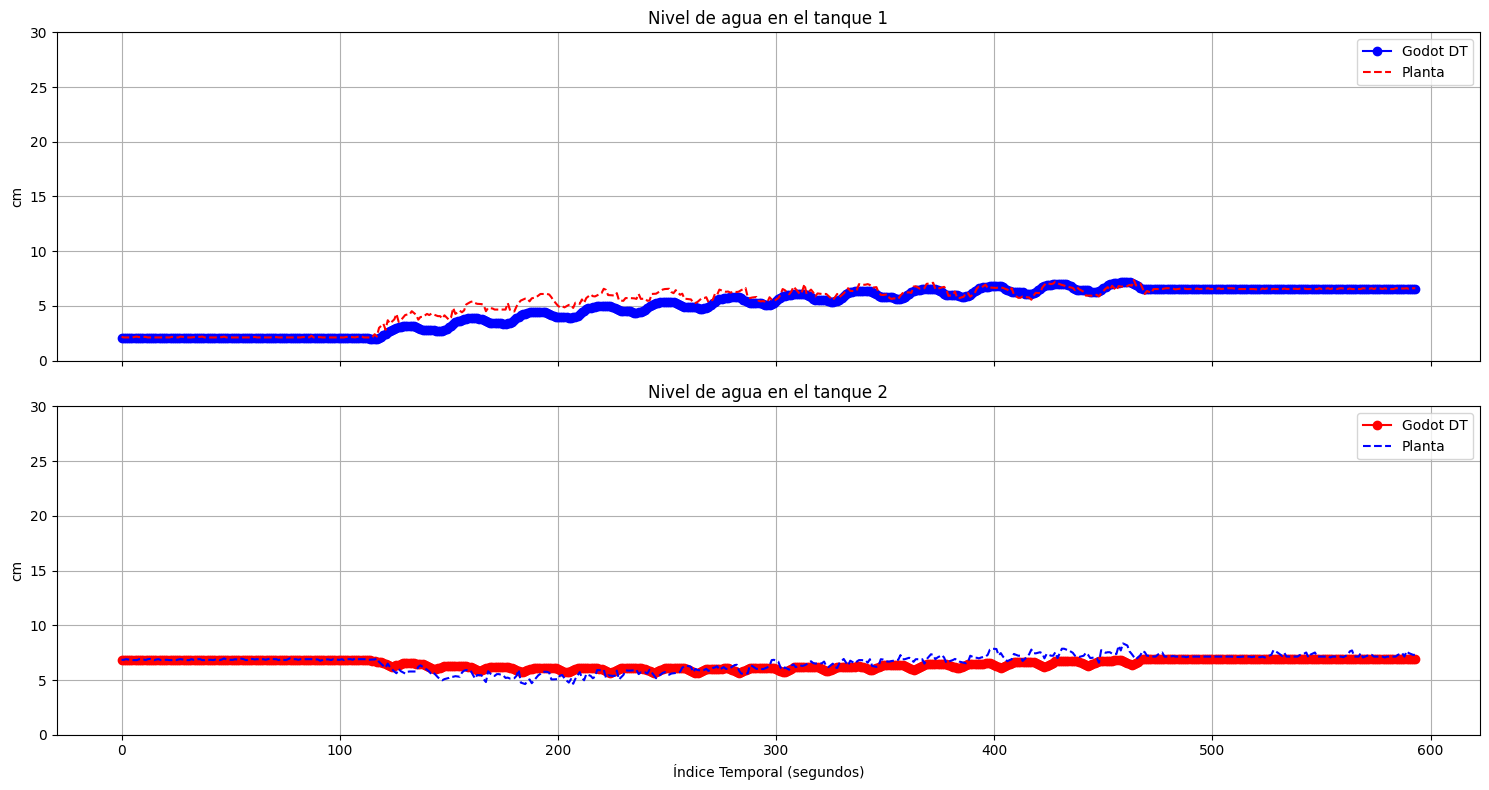

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los archivos CSV
df1 = pd.read_csv('niveles_tanques_cm1.csv')   # CSV generado por godot
df2 = pd.read_csv('niveles_tanques_pool_cm1.csv')  # CSV con los datos interpolados

# Crear un eje temporal ficticio (índice secuencial, 1 segundo por fila)
max_rows = max(len(df1), len(df2))  # Usar la longitud del CSV más largo
tiempo = np.arange(max_rows)  # [0, 1, 2, ..., max_rows-1]

# Crear una figura con 2 subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Gráfico 1: NivelTanque1 y Valor_1
ax1.plot(tiempo[:len(df1)], df1['NivelTanque1'], label='Godot DT', color='blue', marker='o')
ax1.plot(tiempo[:len(df2)], df2['Nivel1'], label='Planta', color='red', linestyle='--')
ax1.set_title('Nivel de agua en el tanque 1')
ax1.set_ylabel('cm')
ax1.set_ylim(0, 30)  # Establecer límites del eje y de 0 a 30
ax1.legend()
ax1.grid(True)

# Gráfico 2: NivelTanque2 y Valor_2
ax2.plot(tiempo[:len(df1)], df1['NivelTanque2'], label='Godot DT', color='red', marker='o')
ax2.plot(tiempo[:len(df2)], df2['Nivel2'], label='Planta', color='blue', linestyle='--')
ax2.set_title('Nivel de agua en el tanque 2')
ax2.set_xlabel('Índice Temporal (segundos)')
ax2.set_ylabel('cm')
ax2.set_ylim(0, 30)  # Establecer límites del eje y de 0 a 30
ax2.legend()
ax2.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Gráfica del estado de la bomba

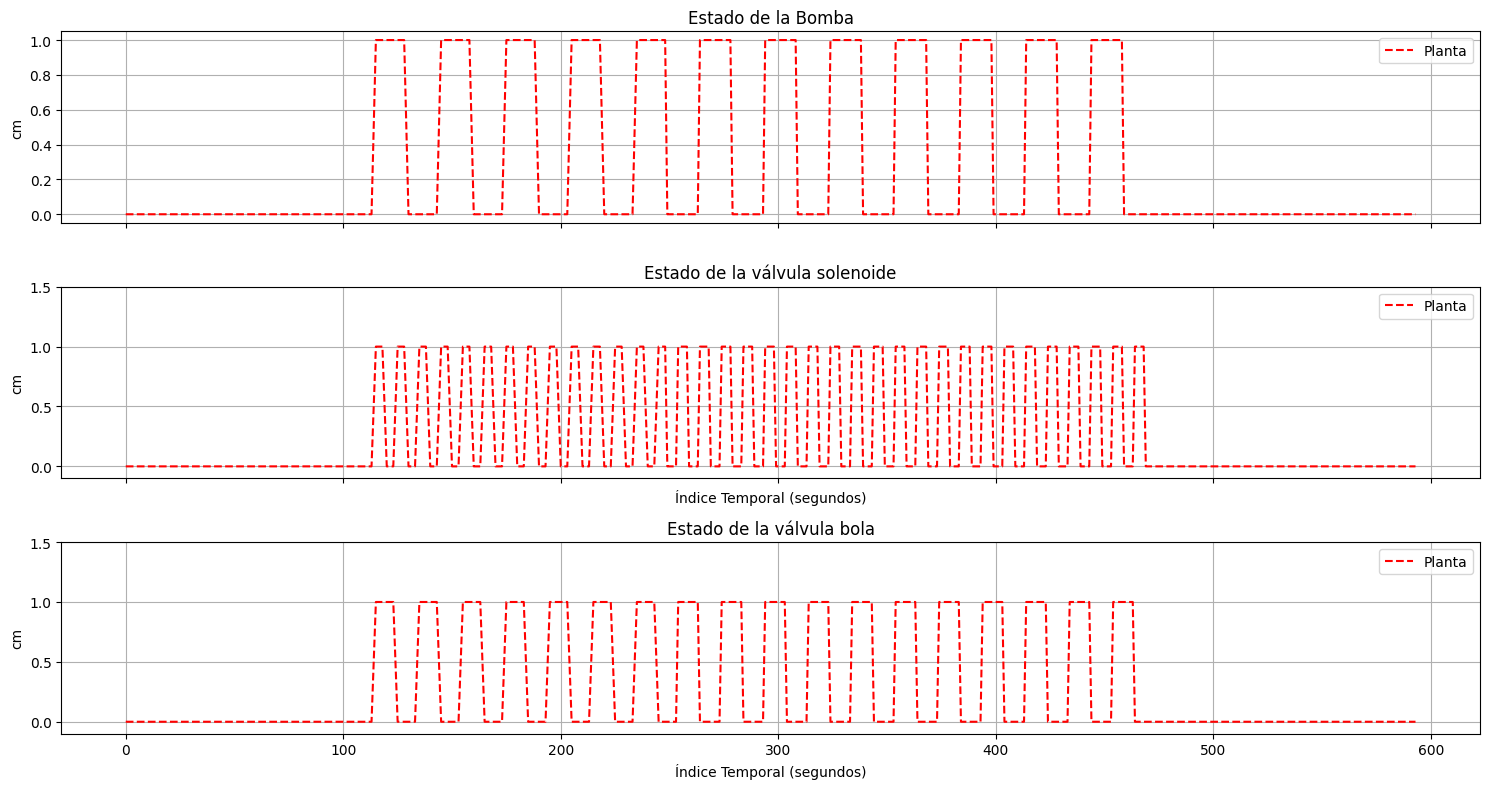

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los archivos CSV
df1 = pd.read_csv('apertura_valvulas1.csv')  # CSV generado por godot
df2 = pd.read_csv('apertura_valvulas_planta1.csv')  # CSV con los datos interpolados

# Crear un eje temporal ficticio (índice secuencial, 1 segundo por fila)
max_rows = max(len(df1), len(df2))  # Usar la longitud del CSV más largo
tiempo = np.arange(max_rows)  # [0, 1, 2, ..., max_rows-1]

# Crear una figura con 2 subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Gráfico 1: NivelTanque1 y Valor_1
#ax1.plot(tiempo[:len(df1)], df1[' CtrlBomba'], label='Godot DT', color='blue', marker='o')
ax1.plot(tiempo[:len(df2)], df2['CtrlBomba'], label='Planta', color='red',linestyle='--')
ax1.set_title('Estado de la Bomba')
ax1.set_ylabel('cm')
ax2.set_ylim(-0.1, 1.5)  # Establecer límites del eje y de 0 a 30
ax1.legend()
ax1.grid(True)

# Gráfico 2: NivelTanque2 y Valor_2
#ax2.plot(tiempo[:len(df1)], df1['CtrlSValve'], label='Godot DT', color='blue')
ax2.plot(tiempo[:len(df2)], df2['CtrlSValve'], label='Planta', color='red', linestyle='--')
ax2.set_title('Estado de la válvula solenoide')
ax2.set_xlabel('Índice Temporal (segundos)')
ax2.set_ylabel('cm')
ax2.set_ylim(-0.1, 1.5)  # Establecer límites del eje y de 0 a 30
ax2.legend()
ax2.grid(True)

# Gráfico 2: NivelTanque2 y Valor_2
#ax3.plot(tiempo[:len(df1)], df1['CtrlBValve'], label='Godot DT', color='blue')
ax3.plot(tiempo[:len(df2)], df2['CtrlBValve'], label='Planta', color='red',linestyle='--')
ax3.set_title('Estado de la válvula bola')
ax3.set_xlabel('Índice Temporal (segundos)')
ax3.set_ylabel('cm')
ax3.set_ylim(-0.1, 1.5)  # Establecer límites del eje y de 0 a 30
#ax3.set_xlim(275,325)
ax3.legend()
ax3.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Gráfica de los caudales

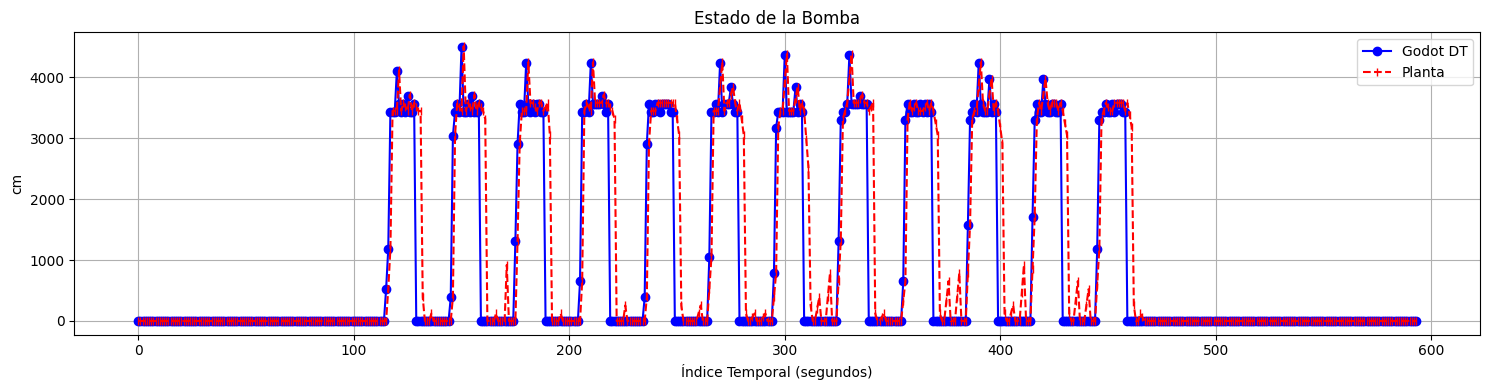

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer los archivos CSV
df1 = pd.read_csv('caudales_1.csv')  # CSV generado por godot
df2 = pd.read_csv('caudales_planta1.csv')  # CSV con los datos interpolados

# Crear un eje temporal ficticio (índice secuencial, 1 segundo por fila)
max_rows = max(len(df1), len(df2))  # Usar la longitud del CSV más largo
tiempo = np.arange(max_rows)  # [0, 1, 2, ..., max_rows-1]

# Crear una figura con un solo gráfico
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))

# Gráfico: NivelTanque1 y Valor_1
ax1.plot(tiempo[:len(df1)], df1['CaudalEntrada'], label='Godot DT', color='blue', marker='o')
ax1.plot(tiempo[:len(df2)], df2['Qin'], label='Planta', color='red', marker='|', linestyle='--')
ax1.set_title('Estado de la Bomba')
ax1.set_xlabel('Índice Temporal (segundos)')
ax1.set_ylabel('cm')
ax1.legend()
ax1.grid(True)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()